In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('linear_regression.csv', index_col = 0)

In [ ]:
#Przeformatowanie zmiennej kategorycznej tak by zawierała liczby zamiast napisy
df['X6'] = df['X6'].apply(lambda kolor: 0 if kolor == 'red' else 1)

describing = df.iloc[:,[0,1,2,3,4,5,-1]].to_numpy()
result1 = df.loc[:,'Y1'].to_numpy()

X_train, X_val, Y_train, Y_val = train_test_split(describing, result1, test_size=0.3)

In [ ]:
#Uruchamiać tylko raz!
X_train = X_train.transpose()
X_val = X_val.transpose()
Y_train = Y_train.reshape((1, 70))
Y_val = Y_val.reshape((1, 30))

## Gradient descent

In [ ]:
class LinearRegr:
    def fit(self, X_train : np.ndarray, Y_train : np.ndarray,
            validation: bool = False, 
            X_val : np.ndarray | None = None, Y_val : np.ndarray | None = None,
            eta: float = 0.05, epochs: int = 50, 
            verbose: bool = True, plot : bool = True):
        
        n, m = X_train.shape
        X_train = np.vstack((np.ones((1, m)), X_train))

        n, m = X_train.shape
        self.Beta=np.zeros((n,1))

        if not validation:
            X_val, Y_val = X_train, Y_train
            m2 = m
        else:
            if X_val is None or Y_val is None:
                raise ValueError("If validation is False, X_val and Y_val are required")
            n2, m2 = X_val.shape
            X_val = np.vstack((np.ones((1, m2)), X_val))
            
        testy=[]
        
        max_gradient_norm = 1

        for k in range(epochs):
            b = self.Beta.transpose() @ X_train - Y_train
            grad = (2/m) *  b @ X_train.transpose()
            
            self.Beta = self.Beta - eta * grad.transpose() / np.linalg.norm(grad)
            test = (1/m2*(temp:=(self.Beta.transpose()@X_val-Y_val))@temp.transpose())[0,0]

            if verbose:
                print(f"Epoch: {k}, Loss function for validation vector: {test:.4f}")
            if plot:
                testy.append(test)

        if plot:
            plt.plot(np.arange(epochs),testy,ls='-.')
            plt.title('Value of the loss function for validation vector after each epoch')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()
            
        return self
    
    def predict(self, X : np.ndarray) -> np.ndarray:
        k, m = X.shape
        X_t = np.vstack((np.ones((1, m)), X))
        Y_pred = self.Beta.transpose() @ X_t
        return Y_pred

Epoch: 0, Loss function for validation vector: 48.6893
Epoch: 1, Loss function for validation vector: 43.0558
Epoch: 2, Loss function for validation vector: 38.1488
Epoch: 3, Loss function for validation vector: 33.9463
Epoch: 4, Loss function for validation vector: 30.4168
Epoch: 5, Loss function for validation vector: 27.5140
Epoch: 6, Loss function for validation vector: 25.1693
Epoch: 7, Loss function for validation vector: 23.2839
Epoch: 8, Loss function for validation vector: 21.7296
Epoch: 9, Loss function for validation vector: 20.3722
Epoch: 10, Loss function for validation vector: 19.1132
Epoch: 11, Loss function for validation vector: 17.9064
Epoch: 12, Loss function for validation vector: 16.7405
Epoch: 13, Loss function for validation vector: 15.6172
Epoch: 14, Loss function for validation vector: 14.5401
Epoch: 15, Loss function for validation vector: 13.5121
Epoch: 16, Loss function for validation vector: 12.5350
Epoch: 17, Loss function for validation vector: 11.6096
Ep

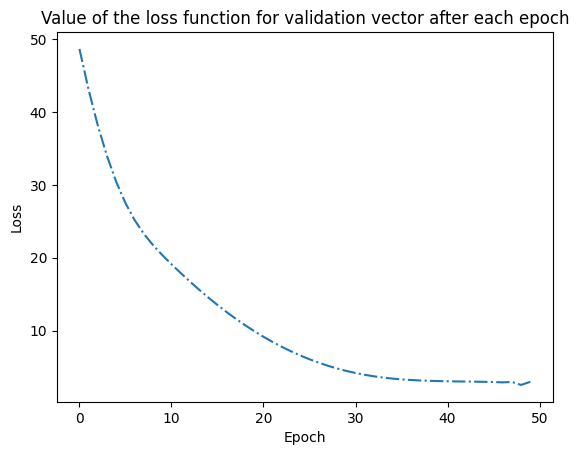

In [ ]:
model = LinearRegr()

model.fit(X_train, Y_train, validation=True, 
          X_val=X_val, Y_val=Y_val) 

## Stochastic gradient descent

In [ ]:
class RidgeRegr:
    def __init__(self,l : float = 0.05):
        self.l = l
    def fit(self, X_train : np.ndarray, Y_train : np.ndarray,
            validation: bool = False, 
            X_val : np.ndarray | None = None, Y_val : np.ndarray | None = None,
            eta: float = 0.005, epochs: int = 50, 
            verbose: bool = True, plot : bool = True):
        
        n, m = X_train.shape
        X_train = np.vstack((np.ones((1, m)), X_train))

        n, m = X_train.shape
        self.Beta=np.zeros((n,1))

        if not validation:
            X_val, Y_val = X_train, Y_train
            m2 = m
        else:
            if X_val is None or Y_val is None:
                raise ValueError("If validation is False, X_val and Y_val are required")
            n2, m2 = X_val.shape
            X_val = np.vstack((np.ones((1, m2)), X_val))
            
        testy = []
        
        for k in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)

            for i in indices:
                x_i = X_train[:, i:i+1]
                y_i = Y_train[:, i:i+1]
                b = self.Beta.transpose() @ x_i - y_i
                grad_bledu = 2 * b[0,0] * x_i

                wagi_reg = self.Beta.copy()
                wagi_reg[0, 0] = 0
                grad_kary = 2 * self.l * wagi_reg
                grad = grad_bledu + grad_kary
                self.Beta = self.Beta - eta * grad / np.linalg.norm(grad)
            
            test=(1/m2*(temp:=(self.Beta.transpose()@X_val-Y_val))@temp.transpose())[0,0]\
                + self.l * np.linalg.norm(self.Beta)**2

            if verbose:
                print(f"Epoch: {k}, Loss function for validation vector: {test:.4f}")
            if plot:
                testy.append(test)

        if plot:
            plt.plot(np.arange(epochs),testy,ls='-.')
            plt.title('Value of the loss function for validation vector after each epoch')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()
    
    def predict(self, X : np.ndarray) -> np.ndarray:
        k , m = X.shape
        X_t = np.vstack((np.ones((1, m)), X))
        Y_pred = self.Beta.transpose() @ X_t
        return Y_pred

Epoch: 0, Loss function for validation vector: 34.4403
Epoch: 1, Loss function for validation vector: 26.9439
Epoch: 2, Loss function for validation vector: 22.4768
Epoch: 3, Loss function for validation vector: 19.7383
Epoch: 4, Loss function for validation vector: 17.8982
Epoch: 5, Loss function for validation vector: 16.1291
Epoch: 6, Loss function for validation vector: 14.5078
Epoch: 7, Loss function for validation vector: 13.1956
Epoch: 8, Loss function for validation vector: 12.1047
Epoch: 9, Loss function for validation vector: 10.4901
Epoch: 10, Loss function for validation vector: 9.2170
Epoch: 11, Loss function for validation vector: 8.1008
Epoch: 12, Loss function for validation vector: 7.3113
Epoch: 13, Loss function for validation vector: 6.6258
Epoch: 14, Loss function for validation vector: 5.9183
Epoch: 15, Loss function for validation vector: 5.7350
Epoch: 16, Loss function for validation vector: 5.1995
Epoch: 17, Loss function for validation vector: 5.0257
Epoch: 18,

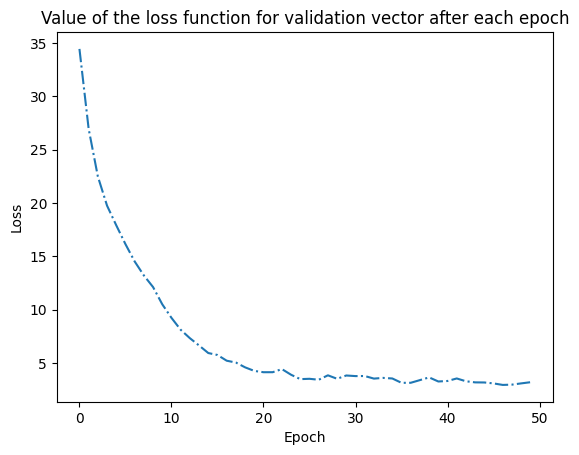

In [ ]:
model = RidgeRegr()

model.fit(X_train, Y_train, validation=True, 
          X_val=X_val, Y_val=Y_val) 